<h1><center>Analysis of Genetic Mutations</center></h1>
<h5><center>*Fragments of analysis</center></h5>
<h2><center>Text Mining</center></h2>
<center>Analyzing text data to find anomalies, patterns and correlations to predict pathogenic gene mutations</center>
<h2><a href="https://github.com/mpavlenk/Genetic-Mutations-Analysis">Data file</a><h2>
<h3><strong>INDEX:</strong><br></h3>
<p>1: <a href="#Data Overview">Data Overview</a><br>
2: <a href="#Visualizations">Visualizations</a><br>
3: <a href="#Text exploration">Text exploration</a><br>
4: <a href="#FT (Term Frequency)">TF (Term Frequency)</a><br>
5: <a href="#Sentiment Analysis">Sentiment Analysis</a><br>                   
6: <a href="#Conclusion">Conclusion</a><p>

In [97]:
#Importing libraries
library('ggplot2')
library('ggthemes') 
library('scales') 
library('grid') 
library('gridExtra') 
library('corrplot') 
library('ggraph')
library('igraph') 
library('dplyr') 
library('readr') 
library('tibble')
library('tidyr') 
library('stringr')
library('forcats')
library('tidytext') 
library('SnowballC')
library('wordcloud')
library('stringr')
library(devtools)
library(ggpubr)
library(h2o)

<h1><font color="red"><center id="Data Overview">Data Overview<a class="anchor-link" href="#Data Overview">&#182;</a><center></font></h1>

In [7]:
#Overview of data
train <- read_csv("training_variants")
test  <- read_csv('test_variants.csv')
head(train)

Parsed with column specification:
cols(
  ID = col_double(),
  Gene = col_character(),
  Variation = col_character(),
  Class = col_double()
)
Parsed with column specification:
cols(
  ID = col_double(),
  Gene = col_character(),
  Variation = col_character(),
  Class = col_double()
)


ID,Gene,Variation,Class
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4
5,CBL,V391I,4


In [8]:
#checking for missing values
sum(is.na(train))
sum(is.na(test))

[1] 0

[1] 0

In [9]:
glimpse(train)
summary(train)

Observations: 3,321
Variables: 4
$ ID        <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
$ Gene      <chr> "FAM58A", "CBL", "CBL", "CBL", "CBL", "CBL", "CBL", "CBL"...
$ Variation <chr> "Truncating Mutations", "W802*", "Q249E", "N454D", "L399V...
$ Class     <dbl> 1, 2, 2, 3, 4, 4, 5, 1, 4, 4, 4, 4, 4, 4, 5, 4, 1, 4, 5, ...


       ID           Gene            Variation             Class      
 Min.   :   0   Length:3321        Length:3321        Min.   :1.000  
 1st Qu.: 830   Class :character   Class :character   1st Qu.:2.000  
 Median :1660   Mode  :character   Mode  :character   Median :4.000  
 Mean   :1660                                         Mean   :4.366  
 3rd Qu.:2490                                         3rd Qu.:7.000  
 Max.   :3320                                         Max.   :9.000  

In [14]:
#There are 3321 different IDs in the training set containing 264 different Gene expressions with 2996 different Variations. 
#count of Genes
train %>%
  group_by(Gene) %>%
  summarise(ct = n()) %>%
  arrange(desc(ct))

Gene,ct
BRCA1,264
TP53,163
EGFR,141
PTEN,126
BRCA2,125
KIT,99
BRAF,93
ALK,69
ERBB2,69
PDGFRA,60


In [149]:
#Aggregating genes by class
gene_per_class<- aggregate(train$Gene, by=list(train$Class),FUN= n_distinct) 
colnames(gene_per_class) = c('Class','Genes')
gene_per_class

Class,Genes
1,142
2,96
3,26
4,92
5,48
6,56
7,108
8,12
9,10


In [15]:
#count of variations
train %>%
  group_by(Variation) %>%
  summarise(ct = n()) %>%
  arrange(desc(ct))

Variation,ct
Truncating Mutations,93
Deletion,74
Amplification,71
Fusions,34
Overexpression,6
G12V,4
E17K,3
Q61H,3
Q61L,3
Q61R,3


In [150]:
#Aggregating genes by class
var_per_class<- aggregate(train$Variation, by=list(train$Class),FUN= n_distinct) 
colnames(var_per_class) = c('Class','Variation')
var_per_class

Class,Variation
1,423
2,399
3,89
4,669
5,242
6,265
7,889
8,19
9,37


In [133]:
#Checking the proportion of classes in the training dataset
#We notice class 7 has a high presence in the data
prop.table(table(train$Class))


          1           2           3           4           5           6 
0.171032821 0.136103583 0.026799157 0.206564288 0.072869618 0.082806384 
          7           8           9 
0.286961759 0.005721168 0.011141223 

<p>

<h1><font color="red"><center id="Visualizations">Visualizations<a class="anchor-link" href="#Visualizations">&#182;</a><center></font></h1>

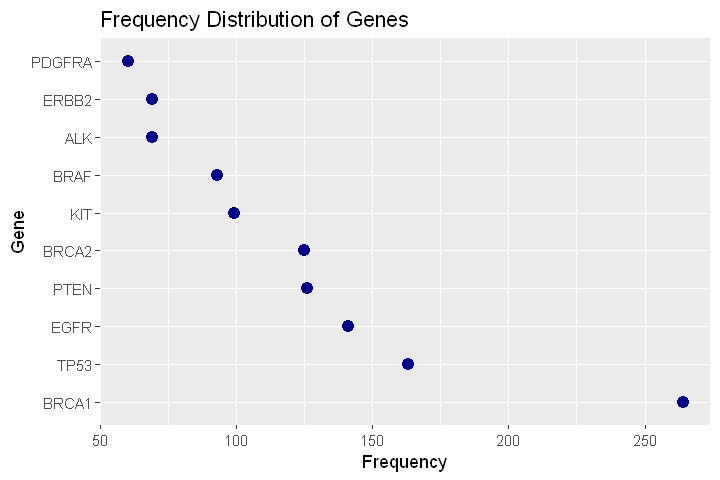

In [139]:
#frequency distribution of the most frequent Gene values
options(repr.plot.width=6, repr.plot.height=4)
gene <- train %>%
  group_by(Gene) %>%
  summarise(cntg = n()) %>%
  arrange(desc(cntg)) %>%
  filter(cntg>59)
gene %>%
  ggplot(aes(reorder(Gene, -cntg, FUN = min), cntg)) +
  geom_point(size = 3, color='darkblue') +
  labs(x = "Gene", y = "Frequency") +
  coord_flip() +
  ggtitle("Frequency Distribution of Genes") 

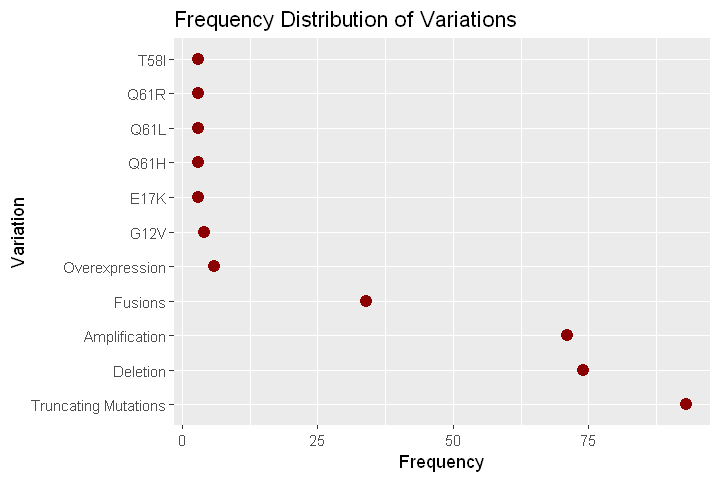

In [140]:
#frequency distribution of the most frequent Variation values
variation <- train %>%
  group_by(Variation) %>%
  summarise(cntv = n()) %>%
  arrange(desc(cntv)) %>%
  filter(cntv>2)

variation %>%
  ggplot(aes(reorder(Variation, -cntv, FUN = min), cntv)) +
  geom_point(size = 3, color='darkred') +
  labs(x = "Variation", y = "Frequency") +
  coord_flip() +
  ggtitle("Frequency Distribution of Variations")

Joining, by = c("ID", "Gene", "Variation", "Class", "set")


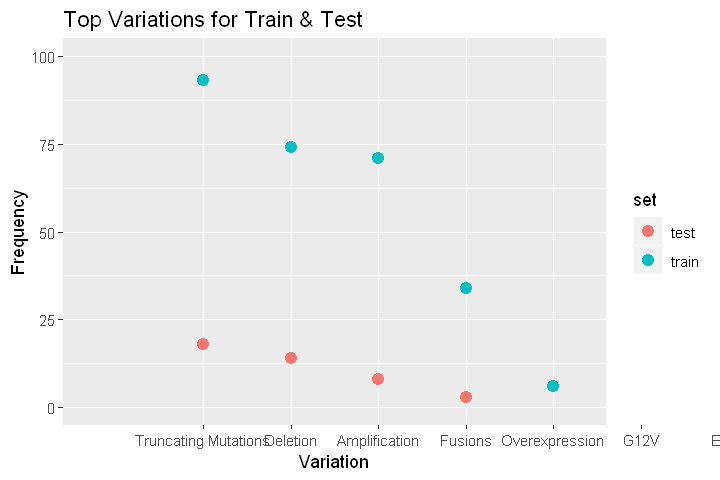

In [38]:
#joining train and test sets
#most frequent Variations in the train vs test data
train1<- train %>% mutate(set = factor("train")) 
test1 <- test %>% mutate(set = factor("test"))
joindf <- suppressWarnings(full_join(train1, test1))

joindf %>%
  group_by(Variation, set) %>%
  summarise(ct = n()) %>%
  filter(ct > 2) %>%
  ggplot(aes(reorder(Variation, -ct, FUN = median), ct, colour = set)) +
  geom_point(size = 3) +
  coord_cartesian(ylim = c(0, 100), xlim=c(0,5)) +
  labs(x = "Variation", y = "Frequency") +
  ggtitle("Top Variations for Train & Test")

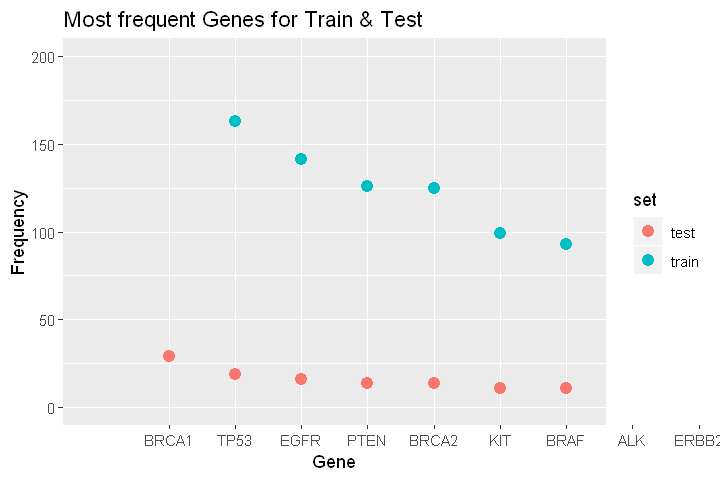

In [39]:
#most frequent Genes in the train vs test data
joindf %>%
  group_by(Gene, set) %>%
  summarise(ct = n()) %>%
  filter(ct > 2) %>%
  ggplot(aes(reorder(Gene, -ct, FUN = median), ct, colour = set)) +
  geom_point(size = 3) +
  coord_cartesian(ylim = c(0, 200), xlim=c(0,7)) +
  labs(x = "Gene", y = "Frequency") +
  ggtitle("Most frequent Genes for Train & Test")

[1] TRUE

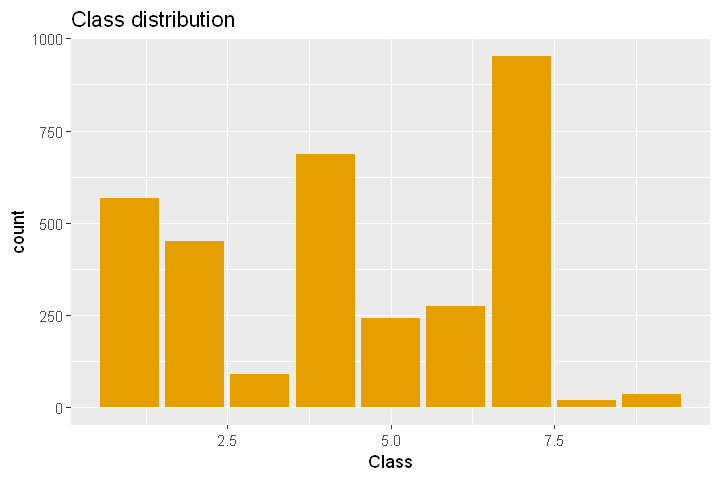

In [40]:
#Class distribution
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
train %>%
  ggplot(aes(Class)) +
  geom_bar(fill="#E69F00") +
  ggtitle("Class distribution")
#We notice that most instances are observed in the class 7. While the least frequesnt instances are in the classes 
8 & 9. 

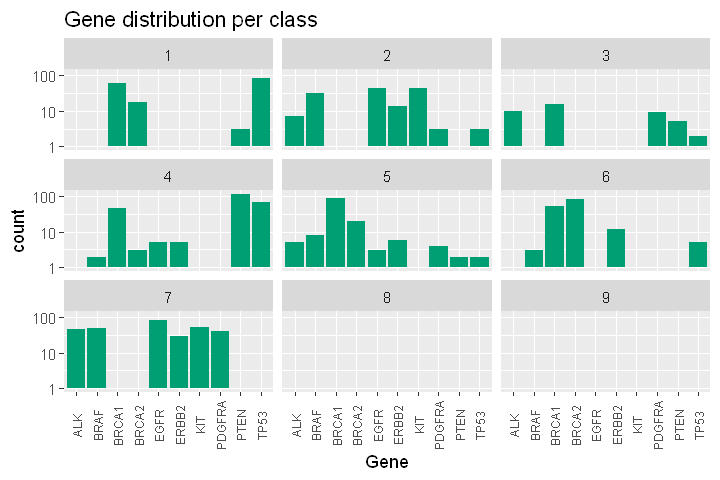

In [41]:
#variables relationships
#frequency distribution of the most frequent Genes for the different Classes
train %>%
  filter(Gene %in% str_c(gene$Gene)) %>%
  ggplot(aes(Gene)) +
  geom_bar(fill="#009E73") +
  scale_y_log10() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=7)) +
  facet_wrap(~ Class) +
  ggtitle("Gene distribution per class")
#First thing we notice is that classes 8 & 9 have none of the most frequest genes.
#Some genes dominate in one classes while alomost absent in others. In particuler, EGFR is mostly present in 2 & 7 classes.
#PTEN dominates in class 4.TP53 is predominantly present in class 1 & 4.

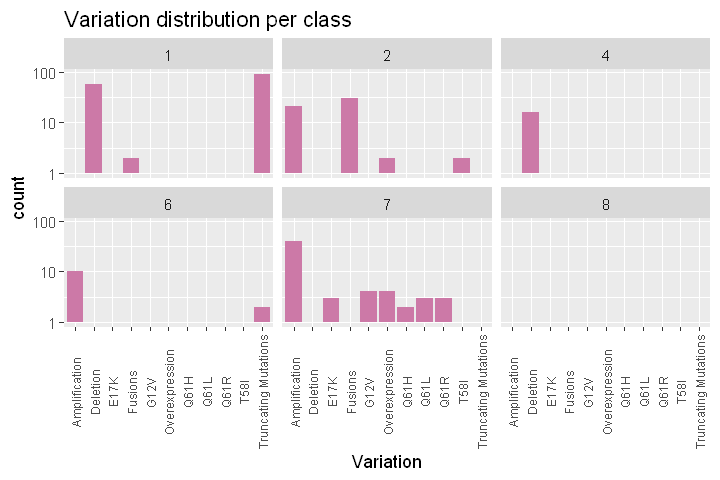

In [34]:
train %>%
  filter(Variation %in% str_c(variation$Variation)) %>%
  ggplot(aes(Variation)) +
  geom_bar(fill="#CC79A7") +
  scale_y_log10() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=7)) +
  facet_wrap(~ Class) +
  ggtitle("Variation distribution per class")
# From the following graph, we observe:
#Truncating mutations are mainly represented in the class 1. 
#Fusions dominate in the class 2.
# Class 8 doesnt contain any of the most frequent variations.

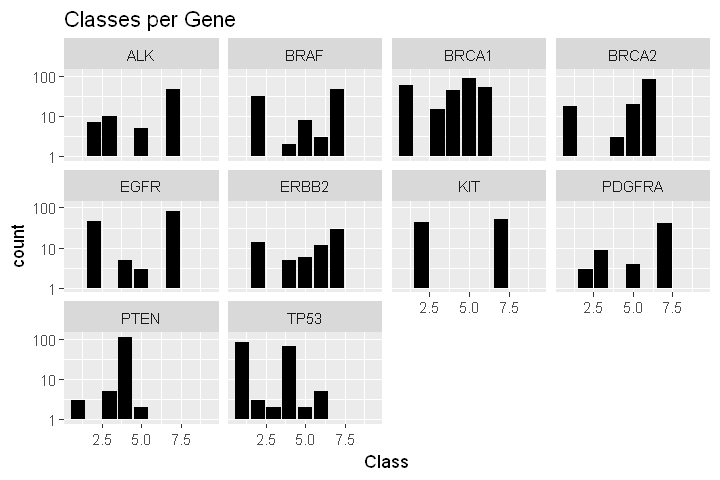

In [35]:
#Classes sorted by Genes 
train %>%
  filter(Gene %in% str_c(gene$Gene)) %>%
  ggplot(aes(Class)) +
  geom_bar(fill="#000000") +
  scale_y_log10() +
  facet_wrap(~ Gene) +
  ggtitle("Classes per Gene")
#ALK is represented in 2,3,5,7 classes
#BRAF is represented in 2,4,5,6,7 classes
#BRCA1 is uniformly destributed amonth 1,3,4,5,6 classes
#BRCA2 is present in 2,4,5,7 classes
#ERBB2 dominates in 2,4,5,6,7 classes
#KIT is shared between 2 classes: 2 & 7
#PDGFRA is observed in the classes 2,3,5,7
#PTEN dominates in the class 4 but is also present in 1,3,5
#TP53 is prediminantly present in 1 and 4 but is also observed in 2,3,5,6

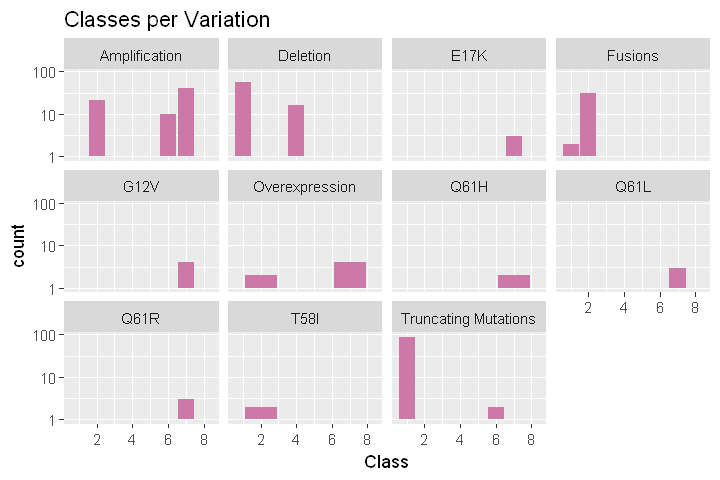

In [42]:
train %>%
  filter(Variation %in% str_c(variation$Variation)) %>%
  ggplot(aes(Class)) +
  geom_bar(fill="#CC79A7") +
  scale_y_log10() +
  facet_wrap(~ Variation) +
  ggtitle("Classes per Variation") 
#This illustration demontrates presence of the most frequent variations in classes.

<h1><font color="red"><center id="Text exploration">Text exploration<a class="anchor-link" href="#Text exploration">&#182;</a><center></font></h1>

In [122]:
#Reading in the text files
train.txt <- readLines("training_text")
test.txt <-readLines("test_text")

In [ ]:
#Separating the columns in a structure of a dataframe
train.txt <- str_split_fixed(train.txt[2:length(train.txt)], "\\|\\|",2)  
train.txt<-data_frame(ID=train.txt[,1], text=train.txt[,2])

test.txt <-str_split_fixed(test.txt[2:length(test.txt)], "\\|\\|",2)
test.txt <- data_frame(ID=test.txt[,1], text=test.txt[,2])

Overview of text data

In [126]:
train.txt %>%
  mutate(txt.len=str_length(text)) %>%
  summary()

      ID                text              txt.len      
 Length:3321        Length:3321        Min.   :     5  
 Class :character   Class :character   1st Qu.: 31452  
 Mode  :character   Mode  :character   Median : 46294  
                                       Mean   : 63867  
                                       3rd Qu.: 80349  
                                       Max.   :525742  

In [127]:
train.txt %>%
  mutate(txt.len=str_length(text)) %>%
  filter(txt.len<=50) %>%
  select(ID, text, txt.len)

ID,text,txt.len
1109,null,5
1277,null,5
1407,null,5
1639,null,5
2755,null,5


In [128]:
test.txt %>%
  mutate(txt.len=str_length(text)) %>%
  summary()

      ID                text              txt.len      
 Length:367         Length:367         Min.   :     5  
 Class :character   Class :character   1st Qu.: 30994  
 Mode  :character   Mode  :character   Median : 49007  
                                       Mean   : 67335  
                                       3rd Qu.: 82514  
                                       Max.   :489305  

In [129]:
test.txt %>%
  mutate(txt.len=str_length(text)) %>%
  filter(txt.len<=100) %>%
  select(ID, text, txt.len)

ID,text,txt.len
67,null,5


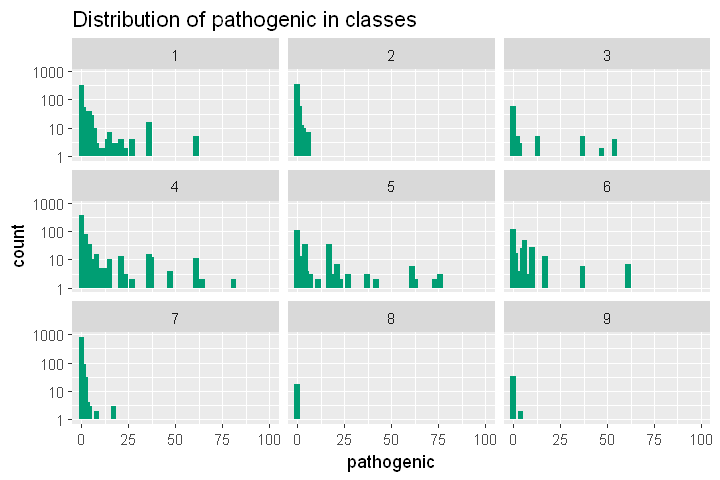

In [59]:
#frequency of occurance of  "pathogenic" and "benign" 
train.txt <- train.txt %>%
  mutate(pathogenic = str_count(text, "pathogenic"),
         benign = str_count(text, "benign"))
temp <- train %>%
  select(ID, Class)
train.txt$ID<-as.numeric(train.txt$ID)

df<-left_join(train.txt, temp, by = "ID") %>%
  ggplot(aes(pathogenic)) +
  geom_bar(width = 3,fill="#009E73") +
  scale_y_log10() +
  facet_wrap(~ Class) +
  coord_cartesian(xlim=c(0,100)) +
  ggtitle("Distribution of pathogenic in classes")

c

#"Pathogenic" isn't traced in classes 8 and 9. However, classes 1 and 4 have the highest frequency of the word "pathogenic".
#Other classes depict "its"pathogenic" presence in different amounts.

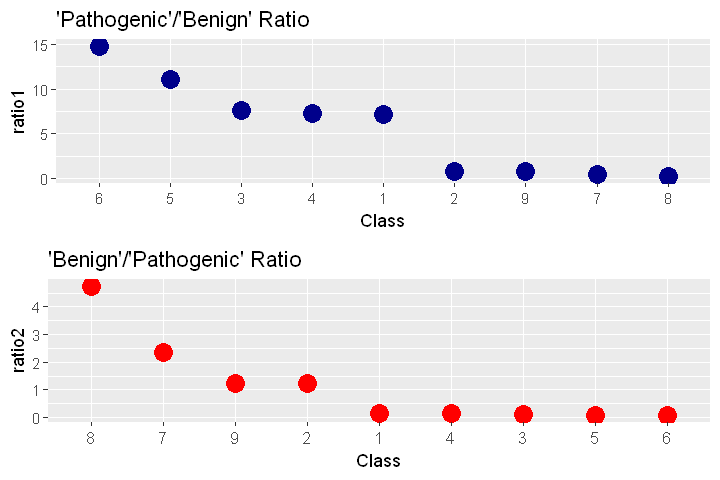

In [63]:
#Now let's plot a ratio of the mean occurence of the word "pathogenic" over the mean occurence of the word "benign" and VS

sp<-full_join(train.txt, temp, by = "ID") %>%
  group_by(Class) %>%
  summarise(ratio1 = mean(pathogenic)/mean(benign)) %>%
  ggplot(aes(reorder(Class, -ratio1, FUN = max), ratio1)) +
  geom_point(colour = "darkblue", size = 5) +
  labs(x = "Class") +
  ggtitle("'Pathogenic'/'Benign' Ratio")

bp<-full_join(train.txt, temp, by = "ID") %>%
  group_by(Class) %>%
  summarise(ratio2 = mean(benign)/mean(pathogenic)) %>%
  ggplot(aes(reorder(Class, -ratio2, FUN = max), ratio2)) +
  geom_point(colour = "red", size = 5) +
  labs(x = "Class") +
  ggtitle("'Benign'/'Pathogenic' Ratio")

figure<-ggarrange(sp, bp + font("x.text", size = 10),
                    ncol = 1, nrow = 2)
figure
#The word 'pathogenic' has the highest count in classes 6,5,3,4,1, while the least count in classes 2,9,7,8
#VS for the word "benign".

<h1><font color="red"><center id="TF (Term Frequency)">TF (Term Frequency)<a class="anchor-link" href="#TF (Term Frequency)">&#182;</a><center></font></h1>

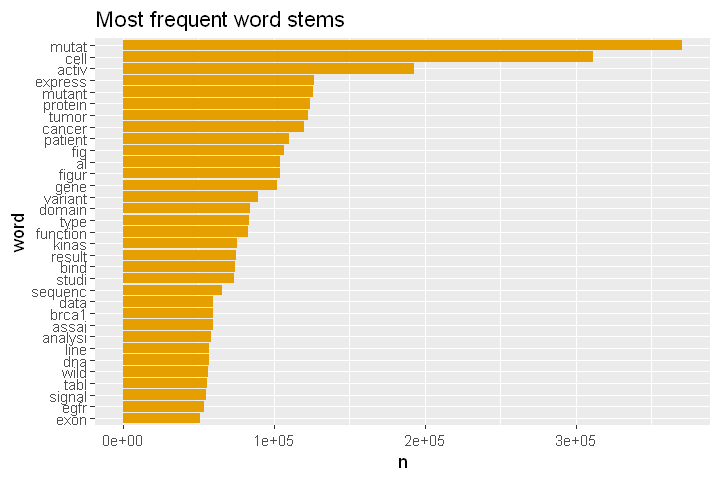

In [66]:
# First of all we need to break the text into individual tokens (so called tokenization) and transform it to a tidy data 
# structure. We will use tidytext’s unnest_tokens() function for that.
data1 <- train.txt %>% select(ID, text) %>% unnest_tokens(word, text)
#The tidytext package contains a dictionary of stop words, like "and" or "next", which we dont want in our data. 
# Additionally, we will remove numbers and symbols.
data("stop_words")
#Removing stop words and converting the words to its root form
data2 <- data1 %>%
  anti_join(stop_words, by = "word") %>%
  mutate(word = wordStem(word)) %>%
  filter(str_detect(word, "[a-z]"))

#most popular words count
data2 %>%
  count(word) %>%
  filter(n > 5e4) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  coord_flip() +
  geom_col(fill="#E69F00") +
  ggtitle("Most frequent word stems")

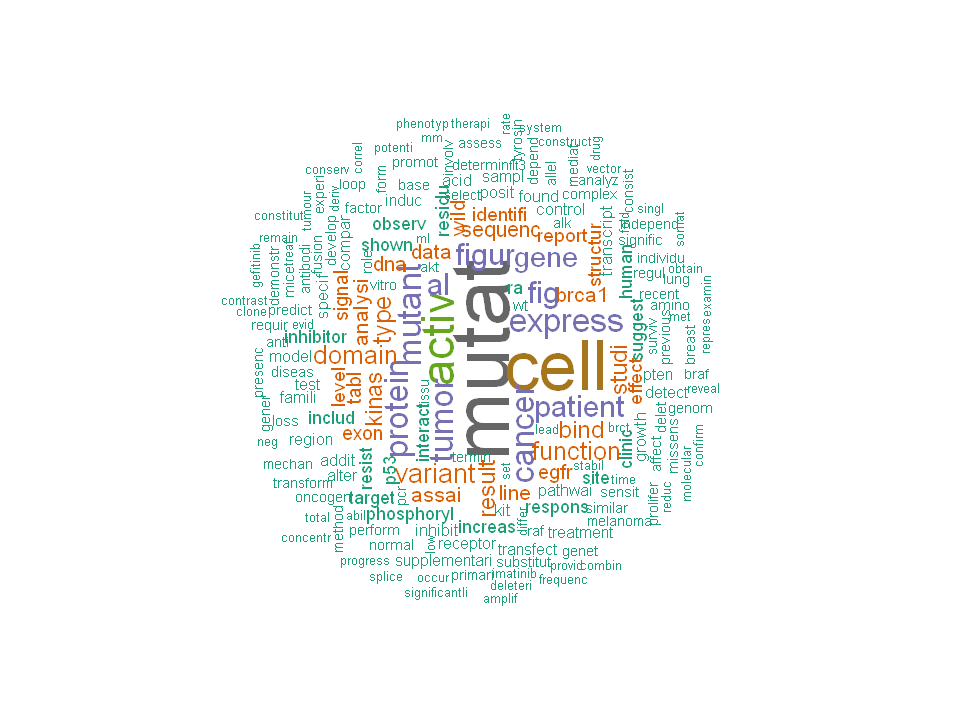

In [71]:
#Here we use a wordcloud to visualize TF
set.seed(1234)
options(repr.plot.width=8, repr.plot.height=6)
data2 %>% 
  count(word) %>%
  with(wordcloud(word, freq = n, min.freq = 1,
                 max.words=200, random.order=FALSE, rot.per=0.35, 
                 colors=brewer.pal(8, "Dark2")))

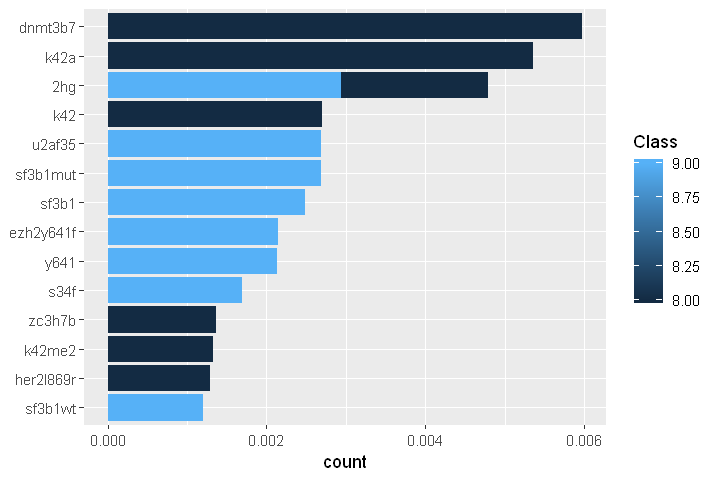

In [165]:
#The bind_tf_idf function in the tidytext package will help us define how many times each Class contains each term
frequency <-full_join(data2, train, by = "ID") %>%
  count(Class, word)
options(repr.plot.width=6, repr.plot.height=4)
tf_idf <- frequency %>%
  bind_tf_idf(word, Class, n)
# The next graph demonstrates the terms with the highest count throughout all classes
# Class 8 has the highest number of dnmt3b7 and k42a. They are followed by the class 8 and its most frequent terms like
#2hg,u2af35 etc. 
tf_idf %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  top_n(15, tf_idf) %>%
  ggplot(aes(word, tf_idf, fill = Class)) +
  geom_col() +
  labs(x = NULL, y = "count") +
  coord_flip()

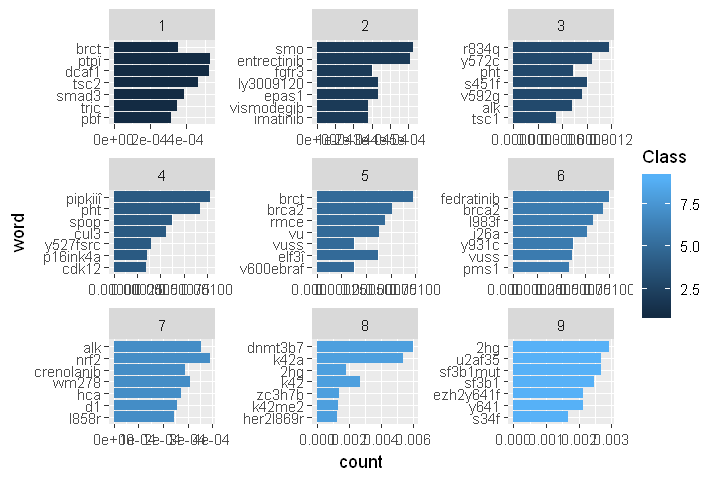

In [166]:
# The following visualization shows the most frequent words per each Class  
  tf_idf %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  group_by(Class) %>%
  top_n(7, tf_idf) %>%
  ggplot(aes(word, tf_idf, fill = Class)) +
  labs(y = "count") +
  facet_wrap(~ Class, ncol = 3, scales = "free") +
  geom_col() +
  coord_flip()

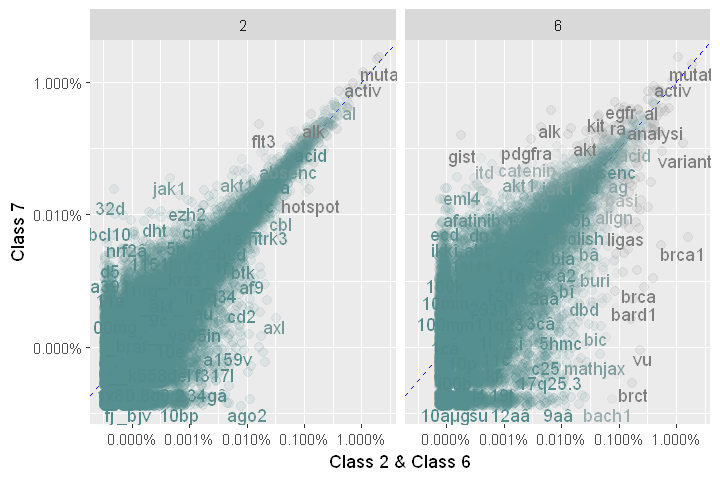

In [171]:
#Grouping the text as per the classes
frequency <- full_join(data2, train, by = "ID")%>%
  count(Class, word) %>%
  group_by(Class) %>%
  mutate(proportion = n / sum(n)) %>% 
  select(-n) %>% 
  spread(Class, proportion) %>% 
  gather(Class, proportion, `2`,`6`)

#Visualizing class 7 word frequency versus classes 2 and 6
#We notice the words 'mutat' and 'activ' most frequently occur in all 3 classes
#Comparing the class 7 with class 2 , the words 'alk' and 'acid' occur frequently in both classes 
image<-ggplot(frequency,aes(x=frequency$proportion, y = `7`, color = abs(`7`- frequency$proportion ))) +
  geom_abline(color = "blue", lty = 2) +
  geom_jitter(alpha = 0.1, size = 2.5, width = 0.1, height = 0.1) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format()) +
  scale_y_log10(labels = percent_format()) +
  scale_color_gradient(limits = c(0, 0.001), low = "darkslategray4", high = "gray75") +
  facet_wrap(facets = ~ Class, ncol=2) +
  theme(legend.position="none") +
  labs(y = "Class 7", x = "Class 2 & Class 6")
suppressWarnings(print(image))

<h1><font color="red"><center id="Sentiment Analysis">Sentiment Analysis<a class="anchor-link" href="#Sentiment Analysis">&#182;</a><center></font></h1>

In [172]:
get_sentiments("afinn")

word,score
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
abhorrent,-3
abhors,-3


In [173]:
get_sentiments("nrc")

word,sentiment
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,negative
abandoned,sadness
abandonment,anger
abandonment,fear


In [177]:
#Filtering out sad words from dataset
joy <- get_sentiments("nrc") %>% 
  filter(sentiment == "sadness")
#We notice 'cancer' has the highest word count
full_join(data2, train, by = "ID") %>%
  filter(Class == "8") %>%
  inner_join(joy) %>%
  count(word, sort = TRUE)

Joining, by = "word"


word,n
cancer,690
inhibit,185
loss,143
tumour,122
leukemia,95
sarcoma,84
treat,81
lower,64
repress,59
death,58


<h1><font color="red"><center id="Conclusion">Conclusion<a class="anchor-link" href="#Conclusion">&#182;</a><center></font></h1>

I have presented snippets of my analysis of clinical data. I attempted to identify patterns, relationships and assertions about genetic mutations based on clinical data. This report included the following measures:

1. Tf-idf statistic - where I measured the importance if each word in the document.
The following set of genes has the highest count: BRCA1,TP53,EGFR,PTEN,BRCA2.    Truncating Mutations are the most frequent variation of a gene. Classes 7 and 4 are represented the most in the dataset. However, class 1 has the highest gene count.
Variation of genes is predominantly present in this set of classes 7, 2,1,6,4.
The word 'pathogenic' prevails in classes 6,5,4,3,1where the following words dominate: brca2, vuss, pht, etc.

2. Relationships between words

3. Sentiment Analysis - where I studied the emotional intent of words to infer whether a section of text is positive or negative. I also looked at the emotional states such as "angry," "sad," and "happy" of the data.

Statistical text analysis and appropriately chosen model will enable us to classify clinical evidence faster, more accurately and efficiently saving the time of medical professionals and reducing patent's waiting time.